Getting started with activation function
https://github.com/PanugantiSasank123/Getting-started-with-activation-function-

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from keras.callbacks import Callback

In [3]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_val, y_val) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
 unique_labels = set(y_train)
 plt.figure(figsize=(12, 12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

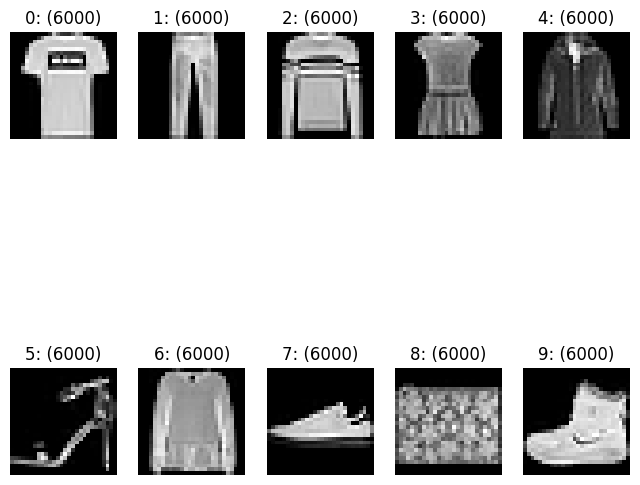

In [5]:
y_train = np.array(y_train).flatten()


unique_labels = np.unique(y_train)


plt.figure(figsize=(8, 8))

for i, label in enumerate(unique_labels):
    indices = np.where(y_train == label)[0]
    image = X_train[indices[0]]

    plt.subplot(2, 5, i + 1)
    plt.axis('off')
    plt.title(f"{label}: ({np.sum(y_train == label)})")
    plt.imshow(image, cmap='gray')
plt.show()

In [6]:
 print(X_val)
 print(y_val)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[9 2 1 ... 8 1 5]


In [7]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_val

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [8]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_val = to_categorical(y_val, n_classes)
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
X_train = np.reshape(X_train, (60000, 784))
X_val = np.reshape(X_val, (10000, 784))
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
 model_sigmoid = Sequential()
 model_sigmoid.add(Dense(700, input_dim=784, activation='sigmoid'))
 model_sigmoid.add(Dense(700, activation='sigmoid'))
 model_sigmoid.add(Dense(700, activation='sigmoid'))
 model_sigmoid.add(Dense(700, activation='sigmoid'))
 model_sigmoid.add(Dense(700, activation='sigmoid'))
 model_sigmoid.add(Dense(350, activation='sigmoid'))
 model_sigmoid.add(Dense(100, activation='sigmoid'))
 model_sigmoid.add(Dense(10, activation='softmax'))
 # Compile model with SGD
 model_sigmoid.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
 model_relu = Sequential()
 model_relu.add(Dense(700, input_dim=784, activation='relu'))
 model_relu.add(Dense(700, activation='relu'))
 model_relu.add(Dense(700, activation='relu'))
 model_relu.add(Dense(700, activation='relu'))
 model_relu.add(Dense(700, activation='relu'))
 model_relu.add(Dense(350, activation='relu'))
 model_relu.add(Dense(100, activation='relu'))
 model_relu.add(Dense(10, activation='softmax'))
 # Compile model with SGD
 model_relu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [12]:
from keras.layers import ELU

model_elu = Sequential()
model_elu.add(Dense(700, input_dim=784))
model_elu.add(ELU())
model_elu.add(Dense(700))
model_elu.add(ELU())
model_elu.add(Dense(700))
model_elu.add(ELU())
model_elu.add(Dense(700))
model_elu.add(ELU())
model_elu.add(Dense(700))
model_elu.add(ELU())
model_elu.add(Dense(350))
model_elu.add(ELU())
model_elu.add(Dense(100))
model_elu.add(ELU())
model_elu.add(Dense(10, activation='softmax'))
# Compile model with SGD
model_elu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [13]:
model_selu = Sequential()
model_selu.add(Dense(700, input_dim=784, activation='selu'))
model_selu.add(Dense(700, activation='selu'))
model_selu.add(Dense(700, activation='selu'))
model_selu.add(Dense(700, activation='selu'))
model_selu.add(Dense(700, activation='selu'))
model_selu.add(Dense(350, activation='selu'))
model_selu.add(Dense(100, activation='selu'))
model_selu.add(Dense(10, activation='softmax'))
# Compile model with SGD
model_selu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [14]:
import tensorflow as tf

model_gelu = Sequential()
model_gelu.add(Dense(700, input_dim=784, activation=tf.keras.activations.gelu))
model_gelu.add(Dense(700, activation=tf.keras.activations.gelu))
model_gelu.add(Dense(700, activation=tf.keras.activations.gelu))
model_gelu.add(Dense(700, activation=tf.keras.activations.gelu))
model_gelu.add(Dense(700, activation=tf.keras.activations.gelu))
model_gelu.add(Dense(350, activation=tf.keras.activations.gelu))
model_gelu.add(Dense(100, activation=tf.keras.activations.gelu))
model_gelu.add(Dense(10, activation='softmax'))
# Compile model with SGD
model_gelu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [15]:
model_tanh = Sequential()
model_tanh.add(Dense(700, input_dim=784, activation='tanh'))
model_tanh.add(Dense(700, activation='tanh'))
model_tanh.add(Dense(700, activation='tanh'))
model_tanh.add(Dense(700, activation='tanh'))
model_tanh.add(Dense(700, activation='tanh'))
model_tanh.add(Dense(350, activation='tanh'))
model_tanh.add(Dense(100, activation='tanh'))
model_tanh.add(Dense(10, activation='softmax'))
# Compile model with SGD
model_tanh.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [16]:
class history_loss(Callback):
 def on_train_begin(self, logs={}):
  self.losses = []
 def on_batch_end(self, batch, logs={}):
  batch_loss = logs.get('loss')
  self.losses.append(batch_loss)

In [17]:
n_epochs = 10
batch_size = 256
validation_split = 0.2
history_sigmoid = history_loss()
model_sigmoid.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
 callbacks=[history_sigmoid],
 validation_split=validation_split, verbose=2)

Epoch 1/10
188/188 - 21s - 112ms/step - accuracy: 0.0980 - loss: 2.3335 - val_accuracy: 0.1005 - val_loss: 2.3029
Epoch 2/10
188/188 - 20s - 106ms/step - accuracy: 0.0991 - loss: 2.3030 - val_accuracy: 0.1003 - val_loss: 2.3028
Epoch 3/10
188/188 - 19s - 103ms/step - accuracy: 0.0995 - loss: 2.3030 - val_accuracy: 0.0983 - val_loss: 2.3029
Epoch 4/10
188/188 - 22s - 118ms/step - accuracy: 0.0987 - loss: 2.3029 - val_accuracy: 0.1003 - val_loss: 2.3031
Epoch 5/10
188/188 - 19s - 102ms/step - accuracy: 0.1005 - loss: 2.3030 - val_accuracy: 0.1030 - val_loss: 2.3026
Epoch 6/10
188/188 - 22s - 118ms/step - accuracy: 0.0976 - loss: 2.3029 - val_accuracy: 0.0989 - val_loss: 2.3032
Epoch 7/10
188/188 - 41s - 218ms/step - accuracy: 0.0982 - loss: 2.3030 - val_accuracy: 0.0957 - val_loss: 2.3029
Epoch 8/10
188/188 - 19s - 99ms/step - accuracy: 0.0984 - loss: 2.3030 - val_accuracy: 0.0995 - val_loss: 2.3029
Epoch 9/10
188/188 - 22s - 118ms/step - accuracy: 0.0980 - loss: 2.3030 - val_accuracy: 0

In [18]:
 history_relu = history_loss()
 model_relu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
 callbacks=[history_relu],
 validation_split=validation_split, verbose=2)

Epoch 1/10
188/188 - 22s - 115ms/step - accuracy: 0.4527 - loss: 1.9277 - val_accuracy: 0.6429 - val_loss: 1.2014
Epoch 2/10
188/188 - 19s - 101ms/step - accuracy: 0.6810 - loss: 0.9102 - val_accuracy: 0.6707 - val_loss: 0.9185
Epoch 3/10
188/188 - 21s - 114ms/step - accuracy: 0.7507 - loss: 0.7008 - val_accuracy: 0.7897 - val_loss: 0.6509
Epoch 4/10
188/188 - 19s - 100ms/step - accuracy: 0.7885 - loss: 0.6018 - val_accuracy: 0.7561 - val_loss: 0.6461
Epoch 5/10
188/188 - 20s - 108ms/step - accuracy: 0.8084 - loss: 0.5464 - val_accuracy: 0.8197 - val_loss: 0.5179
Epoch 6/10
188/188 - 21s - 110ms/step - accuracy: 0.8199 - loss: 0.5148 - val_accuracy: 0.8273 - val_loss: 0.4994
Epoch 7/10
188/188 - 21s - 109ms/step - accuracy: 0.8295 - loss: 0.4863 - val_accuracy: 0.8056 - val_loss: 0.5452
Epoch 8/10
188/188 - 21s - 109ms/step - accuracy: 0.8347 - loss: 0.4688 - val_accuracy: 0.8359 - val_loss: 0.4709
Epoch 9/10
188/188 - 22s - 115ms/step - accuracy: 0.8390 - loss: 0.4556 - val_accuracy: 

In [19]:
history_elu = history_loss()
model_elu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
              callbacks=[history_elu],
              validation_split=validation_split, verbose=2)


Epoch 1/10
188/188 - 21s - 114ms/step - accuracy: 0.7181 - loss: 0.8770 - val_accuracy: 0.7871 - val_loss: 0.6088
Epoch 2/10
188/188 - 43s - 229ms/step - accuracy: 0.8084 - loss: 0.5498 - val_accuracy: 0.8155 - val_loss: 0.5182
Epoch 3/10
188/188 - 19s - 101ms/step - accuracy: 0.8241 - loss: 0.4944 - val_accuracy: 0.8152 - val_loss: 0.5080
Epoch 4/10
188/188 - 19s - 103ms/step - accuracy: 0.8336 - loss: 0.4659 - val_accuracy: 0.8323 - val_loss: 0.4634
Epoch 5/10
188/188 - 21s - 114ms/step - accuracy: 0.8404 - loss: 0.4483 - val_accuracy: 0.8409 - val_loss: 0.4549
Epoch 6/10
188/188 - 20s - 107ms/step - accuracy: 0.8454 - loss: 0.4338 - val_accuracy: 0.8426 - val_loss: 0.4352
Epoch 7/10
188/188 - 20s - 107ms/step - accuracy: 0.8503 - loss: 0.4223 - val_accuracy: 0.8437 - val_loss: 0.4344
Epoch 8/10
188/188 - 20s - 106ms/step - accuracy: 0.8530 - loss: 0.4142 - val_accuracy: 0.8295 - val_loss: 0.4637
Epoch 9/10
188/188 - 22s - 118ms/step - accuracy: 0.8561 - loss: 0.4050 - val_accuracy: 

In [20]:
history_selu = history_loss()
model_selu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
               callbacks=[history_selu],
               validation_split=validation_split, verbose=2)


Epoch 1/10
188/188 - 21s - 114ms/step - accuracy: 0.7623 - loss: 0.7290 - val_accuracy: 0.7983 - val_loss: 0.5217
Epoch 2/10
188/188 - 20s - 106ms/step - accuracy: 0.8414 - loss: 0.4368 - val_accuracy: 0.8509 - val_loss: 0.4135
Epoch 3/10
188/188 - 19s - 102ms/step - accuracy: 0.8589 - loss: 0.3939 - val_accuracy: 0.8577 - val_loss: 0.3882
Epoch 4/10
188/188 - 22s - 119ms/step - accuracy: 0.8661 - loss: 0.3694 - val_accuracy: 0.8584 - val_loss: 0.3915
Epoch 5/10
188/188 - 19s - 102ms/step - accuracy: 0.8725 - loss: 0.3530 - val_accuracy: 0.8638 - val_loss: 0.3736
Epoch 6/10
188/188 - 22s - 118ms/step - accuracy: 0.8803 - loss: 0.3340 - val_accuracy: 0.8707 - val_loss: 0.3593
Epoch 7/10
188/188 - 19s - 100ms/step - accuracy: 0.8839 - loss: 0.3208 - val_accuracy: 0.8704 - val_loss: 0.3598
Epoch 8/10
188/188 - 23s - 120ms/step - accuracy: 0.8885 - loss: 0.3102 - val_accuracy: 0.8619 - val_loss: 0.3779
Epoch 9/10
188/188 - 41s - 219ms/step - accuracy: 0.8926 - loss: 0.2996 - val_accuracy: 

In [21]:
history_gelu = history_loss()
model_gelu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
               callbacks=[history_gelu],
               validation_split=validation_split, verbose=2)


Epoch 1/10
188/188 - 24s - 129ms/step - accuracy: 0.1389 - loss: 2.2975 - val_accuracy: 0.1968 - val_loss: 2.2913
Epoch 2/10
188/188 - 41s - 216ms/step - accuracy: 0.2224 - loss: 2.2834 - val_accuracy: 0.2294 - val_loss: 2.2717
Epoch 3/10
188/188 - 42s - 223ms/step - accuracy: 0.1971 - loss: 2.2430 - val_accuracy: 0.1600 - val_loss: 2.1754
Epoch 4/10
188/188 - 40s - 211ms/step - accuracy: 0.2755 - loss: 2.0479 - val_accuracy: 0.4033 - val_loss: 1.8085
Epoch 5/10
188/188 - 41s - 217ms/step - accuracy: 0.4567 - loss: 1.4398 - val_accuracy: 0.5470 - val_loss: 1.1823
Epoch 6/10
188/188 - 21s - 110ms/step - accuracy: 0.6163 - loss: 1.0373 - val_accuracy: 0.6358 - val_loss: 0.8928
Epoch 7/10
188/188 - 23s - 123ms/step - accuracy: 0.6943 - loss: 0.8445 - val_accuracy: 0.7096 - val_loss: 0.8078
Epoch 8/10
188/188 - 40s - 213ms/step - accuracy: 0.7361 - loss: 0.7270 - val_accuracy: 0.7503 - val_loss: 0.7070
Epoch 9/10
188/188 - 41s - 219ms/step - accuracy: 0.7533 - loss: 0.6737 - val_accuracy: 

In [22]:
history_tanh = history_loss()
model_tanh.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
               callbacks=[history_tanh],
               validation_split=validation_split, verbose=2)


Epoch 1/10
188/188 - 23s - 124ms/step - accuracy: 0.7198 - loss: 0.8843 - val_accuracy: 0.7910 - val_loss: 0.6220
Epoch 2/10
188/188 - 39s - 207ms/step - accuracy: 0.8087 - loss: 0.5662 - val_accuracy: 0.8148 - val_loss: 0.5331
Epoch 3/10
188/188 - 20s - 108ms/step - accuracy: 0.8260 - loss: 0.5020 - val_accuracy: 0.8290 - val_loss: 0.4890
Epoch 4/10
188/188 - 19s - 103ms/step - accuracy: 0.8352 - loss: 0.4707 - val_accuracy: 0.8313 - val_loss: 0.4687
Epoch 5/10
188/188 - 22s - 118ms/step - accuracy: 0.8428 - loss: 0.4488 - val_accuracy: 0.8381 - val_loss: 0.4509
Epoch 6/10
188/188 - 40s - 211ms/step - accuracy: 0.8474 - loss: 0.4344 - val_accuracy: 0.8453 - val_loss: 0.4363
Epoch 7/10
188/188 - 19s - 100ms/step - accuracy: 0.8513 - loss: 0.4230 - val_accuracy: 0.8381 - val_loss: 0.4520
Epoch 8/10
188/188 - 22s - 117ms/step - accuracy: 0.8540 - loss: 0.4130 - val_accuracy: 0.8496 - val_loss: 0.4176
Epoch 9/10
188/188 - 19s - 101ms/step - accuracy: 0.8568 - loss: 0.4051 - val_accuracy: 

In [23]:
np.arange(len(history_sigmoid.losses))
print(history_sigmoid.losses)

[2.763857841491699, 2.7381319999694824, 2.6699044704437256, 2.6578569412231445, 2.659571886062622, 2.63161039352417, 2.6143124103546143, 2.612788200378418, 2.6037912368774414, 2.5917325019836426, 2.5864899158477783, 2.5809104442596436, 2.571092367172241, 2.560492753982544, 2.555860996246338, 2.551562786102295, 2.541046380996704, 2.5332000255584717, 2.525071859359741, 2.5190696716308594, 2.5140597820281982, 2.508045196533203, 2.50312876701355, 2.4991602897644043, 2.493359327316284, 2.4875094890594482, 2.48226261138916, 2.4771370887756348, 2.4724409580230713, 2.4690136909484863, 2.465747594833374, 2.4611833095550537, 2.4574172496795654, 2.453920364379883, 2.451066255569458, 2.4478893280029297, 2.4448509216308594, 2.442246198654175, 2.440129041671753, 2.4372260570526123, 2.4346566200256348, 2.432410717010498, 2.430377244949341, 2.4277992248535156, 2.4251062870025635, 2.4227652549743652, 2.421003580093384, 2.4185879230499268, 2.416088342666626, 2.4141042232513428, 2.4122064113616943, 2.410

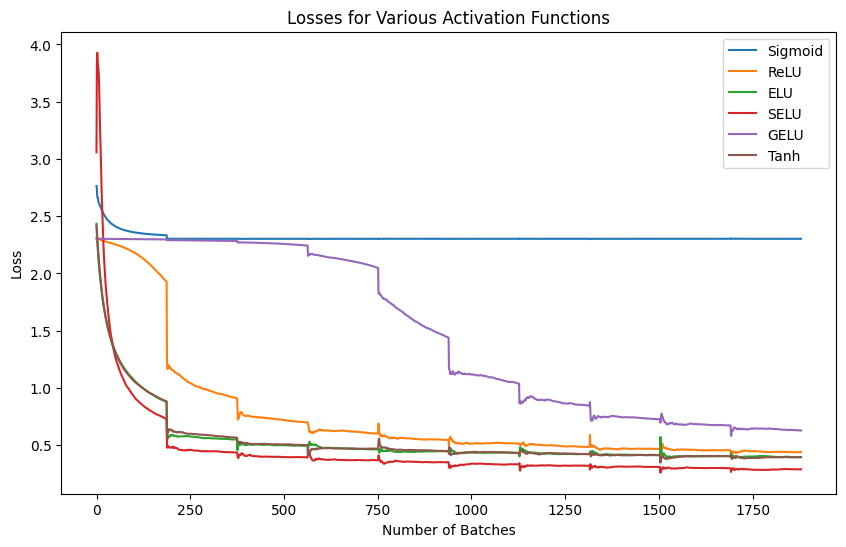

In [24]:
# Plot loss curves for all activation functions
plt.figure(figsize=(10, 6))

# Plotting loss for each activation function
plt.plot(np.arange(len(history_sigmoid.losses)), history_sigmoid.losses, label='Sigmoid')
plt.plot(np.arange(len(history_relu.losses)), history_relu.losses, label='ReLU')
plt.plot(np.arange(len(history_elu.losses)), history_elu.losses, label='ELU')
plt.plot(np.arange(len(history_selu.losses)), history_selu.losses, label='SELU')
plt.plot(np.arange(len(history_gelu.losses)), history_gelu.losses, label='GELU')
plt.plot(np.arange(len(history_tanh.losses)), history_tanh.losses, label='Tanh')

# Add titles and labels
plt.title('Losses for Various Activation Functions')
plt.xlabel('Number of Batches')
plt.ylabel('Loss')

# Add a legend
plt.legend(loc='best')

# Show the plot
plt.show()


In [25]:
w_sigmoid = []
w_relu = []
for i in range(len(model_sigmoid.layers)):
 w_sigmoid.append(max(model_sigmoid.layers[i].get_weights()[1]))
 w_relu.append(max(model_relu.layers[i].get_weights()[1]))
print(w_sigmoid)
print(w_relu)

[4.003971e-06, 3.857468e-06, 1.2078752e-05, 4.6095032e-05, 0.00024158724, 0.0010901471, 0.004313691, 0.03582255]
[0.025240969, 0.022736445, 0.03185308, 0.033179495, 0.042152315, 0.03933845, 0.071158275, 0.13273409]


In [26]:
print(len(model_sigmoid.layers))

8
